In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Loading Dataset & discover it

In [2]:
# Load CSV from Kaggle's mounted input path
df = pd.read_csv("/kaggle/input/mall-customers/Mall_Customers.csv")


# Check first few rows
df[:10]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


# going with only 2 features (income &  spending score)

In [4]:
df = df[["Annual Income (k$)", "Spending Score (1-100)"]]
print(df.head())


   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [5]:
df.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Scale (Normalize)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_normalized.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


## Visual exploration 


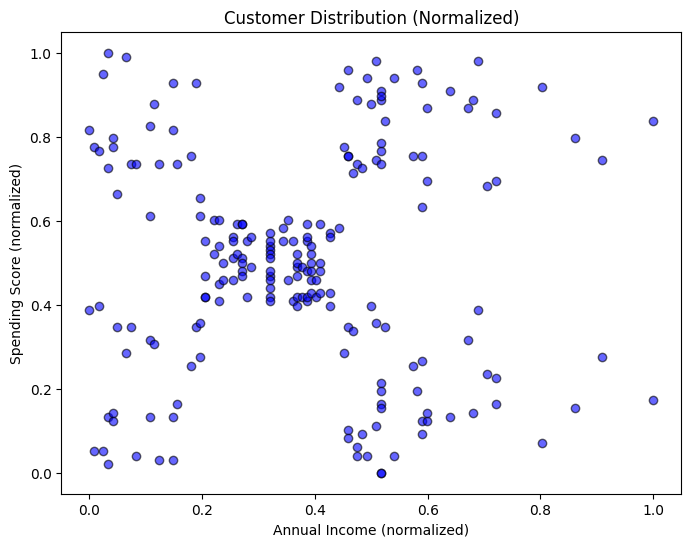

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    df_normalized["Annual Income (k$)"], 
    df_normalized["Spending Score (1-100)"], 
    c="blue", 
    alpha=0.6, 
    edgecolor="k"
)

plt.xlabel("Annual Income (normalized)")
plt.ylabel("Spending Score (normalized)")
plt.title("Customer Distribution (Normalized)")
plt.show()


## K-means algorithm 

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

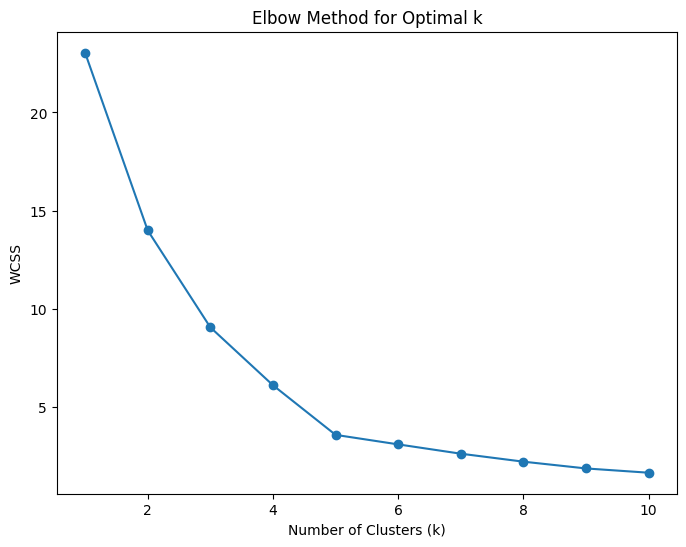

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

# Try k from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)  # WCSS

# Plot the elbow
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


### form the grapgh the best k is equal to 5, how did we know?! by  the elbow method!

In [9]:
# Fit KMeans with chosen k
kmeans = KMeans(n_clusters=5, random_state=42)
df_normalized["Cluster"] = kmeans.fit_predict(df_normalized)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
# keep cluster labels in the original df  # it does not matter, as, if normalized or not -- 
# -- in the end they will be 
# -- in the same class

df["Cluster"] = df_normalized["Cluster"]

In [11]:
print(df.head())


   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        2
1                  15                      81        3
2                  16                       6        2
3                  16                      77        3
4                  17                      40        2


## Visualize clusters 

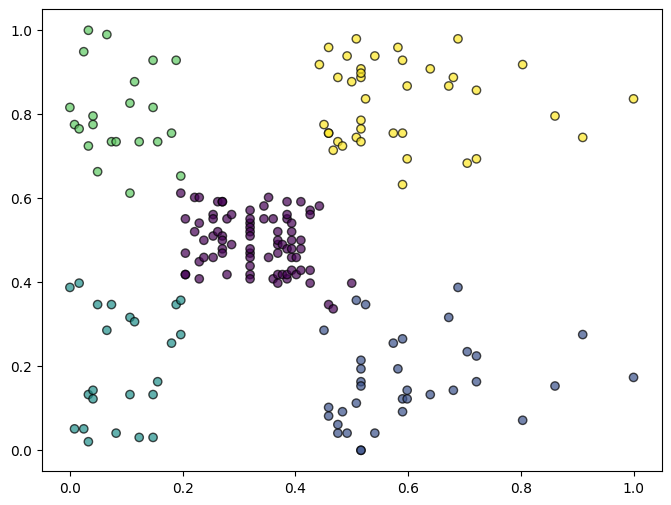

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Scatter plot of each point
plt.scatter(
    df_normalized["Annual Income (k$)"], 
    df_normalized["Spending Score (1-100)"], 
    c=df_normalized["Cluster"], 
    cmap="viridis",  # nice color map
    alpha=0.7,
    edgecolor="k"
)

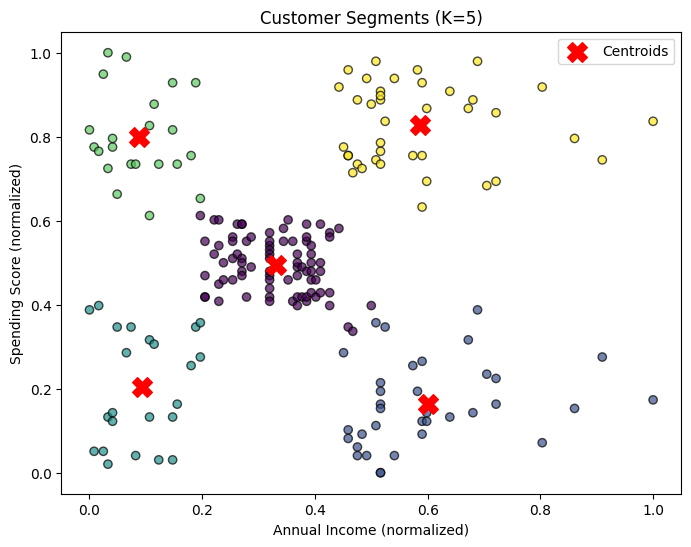

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Scatter plot of each point
plt.scatter(
    df_normalized["Annual Income (k$)"], 
    df_normalized["Spending Score (1-100)"], 
    c=df_normalized["Cluster"], 
    cmap="viridis",  # nice color map
    alpha=0.7,
    edgecolor="k"
)


# Plot centroids
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0], centers[:, 1],
    c="red", s=200, marker="X", label="Centroids"
)

plt.xlabel("Annual Income (normalized)")
plt.ylabel("Spending Score (normalized)")
plt.title("Customer Segments (K=5)")
plt.legend()
plt.show()


## Interpreting the clusters

### Grouping by the two features ["Annual Income (k$) & Spending Score (1-100)"] to label each cluster

In [14]:
# Group by cluster and get averages of original values
cluster_summary = df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_summary)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 88.200000               17.114286
2                 26.304348               20.913043
3                 25.727273               79.363636
4                 86.538462               82.128205


### label and visulaize

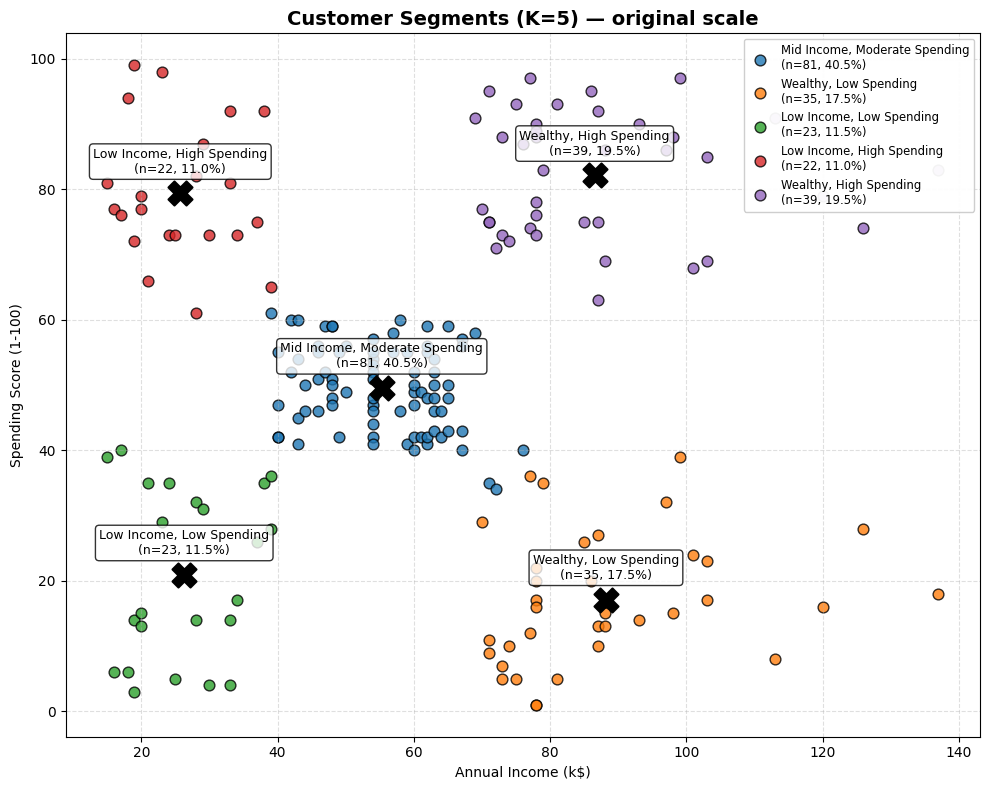

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# --- human-friendly labels you already defined ---
cluster_labels = {
    0: "Mid Income, Moderate Spending",
    1: "Wealthy, Low Spending",
    2: "Low Income, Low Spending",
    3: "Low Income, High Spending",
    4: "Wealthy, High Spending"
}

# --- compute counts and percentages (ordered by cluster id) ---
counts = df["Cluster"].value_counts().sort_index()
pct = (counts / counts.sum() * 100).round(1)

# --- compute centroids in original scale by group means (robust) ---
centers_original = (
    df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]]
    .mean()
    .reindex(range(5))   # ensure rows for clusters 0..4 in order
    .values
)

# --- prepare readable per-cluster labels including size/percent ---
label_texts = {}
for i in range(5):
    base = cluster_labels.get(i, f"Cluster {i}")
    n = int(counts.get(i, 0))
    p = pct.get(i, 0.0)
    label_texts[i] = f"{base}\n(n={n}, {p}%)"

# --- plot each cluster separately with distinct colors for clarity ---
plt.figure(figsize=(10,8))
colors = plt.cm.tab10(np.arange(5))  # 5 distinct colors

for i in range(5):
    mask = df["Cluster"] == i
    plt.scatter(
        df.loc[mask, "Annual Income (k$)"],
        df.loc[mask, "Spending Score (1-100)"],
        s=60,
        alpha=0.8,
        edgecolor="k",
        color=colors[i],
        label=label_texts[i]
    )

# --- plot centroids (big X markers) ---
plt.scatter(centers_original[:, 0], centers_original[:, 1],
            marker="X", s=300, c="black", linewidths=1.5, zorder=5)

# --- annotate centroids (offset so text does not overlap markers) ---
for i, (x, y) in enumerate(centers_original):
    plt.annotate(
        label_texts[i],
        xy=(x, y),
        xytext=(0, 15),            # offset (x,y) by 15 points upward
        textcoords="offset points",
        ha="center",
        fontsize=9,
        bbox=dict(facecolor="white", alpha=0.8, boxstyle="round,pad=0.3")
    )

# --- styling ---
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments (K=5) — original scale", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(loc="upper right", fontsize="small", framealpha=0.95)
plt.tight_layout()
plt.show()


# Bonus

## DBSCAN ALGORITHM

In [16]:
 df_normalized = df_normalized.drop(columns=['Cluster'])  

print(df_normalized.head())


   Annual Income (k$)  Spending Score (1-100)
0            0.000000                0.387755
1            0.000000                0.816327
2            0.008197                0.051020
3            0.008197                0.775510
4            0.016393                0.397959


In [17]:
from sklearn.cluster import DBSCAN
import numpy as np


dbscan = DBSCAN(eps=0.05, min_samples=5)
labels = dbscan.fit_predict(df_normalized)

print("Unique cluster labels and counts:")
print(np.unique(labels, return_counts=True))



Unique cluster labels and counts:
(array([-1,  0,  1,  2,  3,  4,  5]), array([79,  6, 78, 10, 10, 12,  5]))


### Try to choose the optimal eps, min_samples

In [18]:
for eps in np.arange(0.01, 0.2, 0.01):
    for min_samples in range(3, 6):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_normalized)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        print(f"eps={eps:.2f}, min_samples={min_samples} --> clusters: {n_clusters}, noise: {n_noise}")


eps=0.01, min_samples=3 --> clusters: 2, noise: 194
eps=0.01, min_samples=4 --> clusters: 0, noise: 200
eps=0.01, min_samples=5 --> clusters: 0, noise: 200
eps=0.02, min_samples=3 --> clusters: 11, noise: 142
eps=0.02, min_samples=4 --> clusters: 3, noise: 176
eps=0.02, min_samples=5 --> clusters: 3, noise: 179
eps=0.03, min_samples=3 --> clusters: 15, noise: 94
eps=0.03, min_samples=4 --> clusters: 9, noise: 122
eps=0.03, min_samples=5 --> clusters: 5, noise: 152
eps=0.04, min_samples=3 --> clusters: 10, noise: 77
eps=0.04, min_samples=4 --> clusters: 6, noise: 91
eps=0.04, min_samples=5 --> clusters: 4, noise: 103
eps=0.05, min_samples=3 --> clusters: 13, noise: 42
eps=0.05, min_samples=4 --> clusters: 9, noise: 65
eps=0.05, min_samples=5 --> clusters: 6, noise: 79
eps=0.06, min_samples=3 --> clusters: 12, noise: 29
eps=0.06, min_samples=4 --> clusters: 8, noise: 45
eps=0.06, min_samples=5 --> clusters: 8, noise: 57
eps=0.07, min_samples=3 --> clusters: 8, noise: 16
eps=0.07, min_sam

### Visualizing the clusters

### I'll choose eps=0.09, min_samples=4 as blance between no. of clusters and noise!! ( clusters: 5, noise: 14)

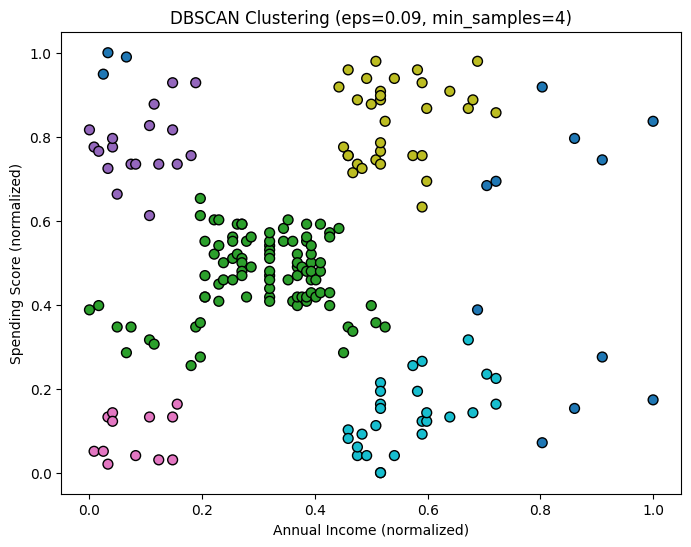

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.09, min_samples=4)
labels = dbscan.fit_predict(df_normalized)

plt.figure(figsize=(8,6))
plt.scatter(df_normalized['Annual Income (k$)'], df_normalized['Spending Score (1-100)'], 
            c=labels, cmap='tab10', s=50, edgecolor='k')
plt.title('DBSCAN Clustering (eps=0.09, min_samples=4)')
plt.xlabel('Annual Income (normalized)')
plt.ylabel('Spending Score (normalized)')
plt.show()


##  analyze average spending per cluster

In [25]:
df['DBSCAN_Cluster'] = labels
print(df.groupby('DBSCAN_Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())


                Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                            
-1                       96.785714               61.714286
 0                       52.645833               47.312500
 1                       25.944444               77.222222
 2                       24.583333                9.583333
 3                       81.060606               83.000000
 4                       83.925926               14.444444


### Interpretation of DBSCAN Clusters



**Cluster -1** (Noise / Outliers):
Customers with very high annual income (~97k$) and medium spending score (~62) who don’t fit neatly into other groups. They might be irregular shoppers or unusual cases.

**Cluster 0**:
Customers with moderate annual income (~53k$) and moderate spending (~47) — these are average spenders with average income.

**Cluster 1**:
Customers with low annual income (~26k$) but high spending score (~77) — possibly younger or budget-conscious customers who spend a lot relative to their income.

**Cluster 2**:
Customers with low income (~25k$) and low spending (~10) — cautious or less engaged shoppers with limited spending.

**Cluster 3**:
Customers with high income (~81k$) and high spending (~83) — premium, loyal, or very engaged customers who spend a lot.

**Cluster 4**:
Customers with high income (~84k$) but low spending (~14) — wealthy customers who don’t spend much, possibly infrequent buyers or less engaged.

### Business Takeaway:


Tailor marketing strategies per segment:

Reward high spenders (Clusters 1 & 3) with loyalty programs.

Encourage Cluster 4 (high income, low spending) with targeted offers.

Find ways to engage low spenders (Clusters 0 & 2) better.

for -1 [points, kust forget them 😊